## Spam Mail Classification using SVM - CH.SC.U4CSE23240

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn

In [3]:
data = pd.read_csv('/content/spam.csv')
print(data.shape)
data.head()

(100, 3)


,word_frequency,message_length,label
0,7,221,not_spam
1,20,209,spam
2,29,247,spam
3,15,33,spam
4,11,114,not_spam


In [4]:
data.isnull().sum()

,0
word_frequency,0
message_length,0
label,0


In [7]:
feature_cols = ['word_frequency','message_length']
X = data[feature_cols]
y = data.label
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(80, 2)

(80,)

(20, 2)

(20,)

In [8]:
model = SVC(kernel='rbf', random_state = 42)
model.fit(x_train, y_train)
svc_pred = model.predict(x_test)
print('svc_prediction : ',svc_pred)

svc_prediction :  ['spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam'
 'spam' 'not_spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam' 'spam']


In [9]:
conf_mat = metrics.confusion_matrix(y_test, svc_pred)
print('SVC')
print('Confusion Matrix : \n',conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, svc_pred)
print('Accuracy Score : ',Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')
print(classification_report(svc_pred,y_test))

SVC
Confusion Matrix : 
 [[ 1  9]
 [ 0 10]]
Accuracy Score :  0.55
Accuracy in Percentage :  55 %
              precision    recall  f1-score   support

    not_spam       0.10      1.00      0.18         1
        spam       1.00      0.53      0.69        19

    accuracy                           0.55        20
   macro avg       0.55      0.76      0.44        20
weighted avg       0.96      0.55      0.66        20



[Text(0.5, 1.0, 'SVC')]

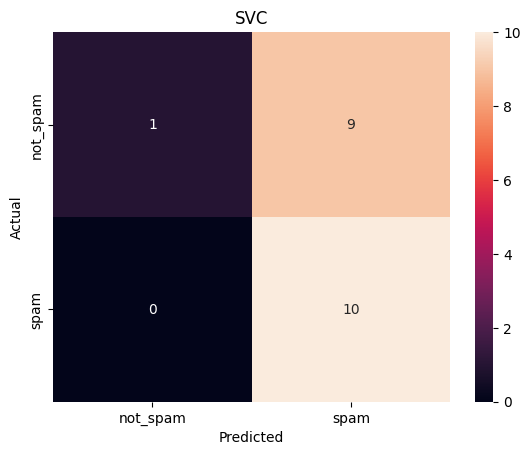

In [10]:
conf_mat = pd.crosstab(y_test, svc_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title = 'SVC')